# Making Waffles

The challenge is to create visually appealing waffle charts using sales data in a csv as input and python to manipulate the data.

I want the waffle chart to look the same as ones I created earlier in Excel.

In [1]:
#importing the required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sales-data-for-waffles/Sales Data For Waffles.csv


In [2]:
# importing the sales data and storing it in a variable

df_sales = pd.read_csv('/kaggle/input/sales-data-for-waffles/Sales Data For Waffles.csv')


In [3]:
#checking the data frame

df_sales.head(5)

,Date,Month,Year,Ticket Type,Quantity
0,02/01/2020,January,2020,Adult,4
1,02/01/2020,January,2020,Adult,5
2,04/01/2020,January,2020,Adult,2
3,07/01/2020,January,2020,Adult,1
4,08/01/2020,January,2020,Adult,10


# Initial Waffle Code

I asked chat gpt to give me some code definig a variable that creates a waffle chart to get me started.

<Figure size 1000x500 with 0 Axes>

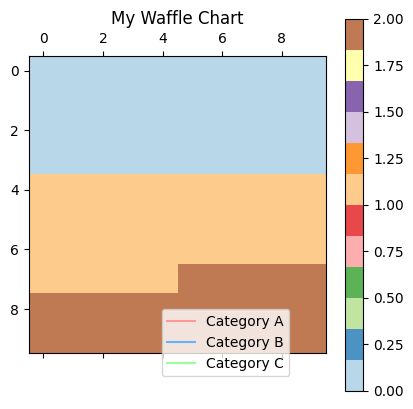

In [4]:
# Testing the waffle code

def create_waffle_chart(categories, values, rows=10, cols=10, colors=None, title='Test Waffle Chart'):
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # Define the total number of tiles
    total_tiles = rows * cols
    tiles_per_category = [round(proportion * total_tiles) for proportion in category_proportions]

    # Create a list of category indexes
    waffle_chart = np.zeros((rows, cols), dtype=int)

    # Populate the waffle chart
    category_index = 0
    for r in range(rows):
        for c in range(cols):
            if tiles_per_category[category_index] == 0:
                category_index += 1
            waffle_chart[r, c] = category_index
            tiles_per_category[category_index] -= 1

    # Plotting the waffle chart
    plt.figure(figsize=(10, 5))
    plt.matshow(waffle_chart, cmap=plt.cm.Paired, alpha=0.8)
    plt.colorbar()

    # Create legend
    if colors:
        for i, category in enumerate(categories):
            plt.plot([], [], color=colors[i], label=category)
        plt.legend(loc='lower right', bbox_to_anchor=(0.9, -0.1))

    plt.title(title)
    plt.show()

# Example Usage
categories = ['Category A', 'Category B', 'Category C']
values = [40, 35, 25]
colors = ['#FF9999', '#66B2FF', '#99FF99']

create_waffle_chart(categories, values, rows=10, cols=10, colors=colors, title='My Waffle Chart')


# Amend the code to alter the design of the waffle chart

Changes include: removing the colour bar, adding gridlines and making them thick and black, removing the axis labels, adding a variable for the title, colouring the blackground black and the title white, creating a horizontal legend that sits undeneath the chart, linking the chart colours to the color variable

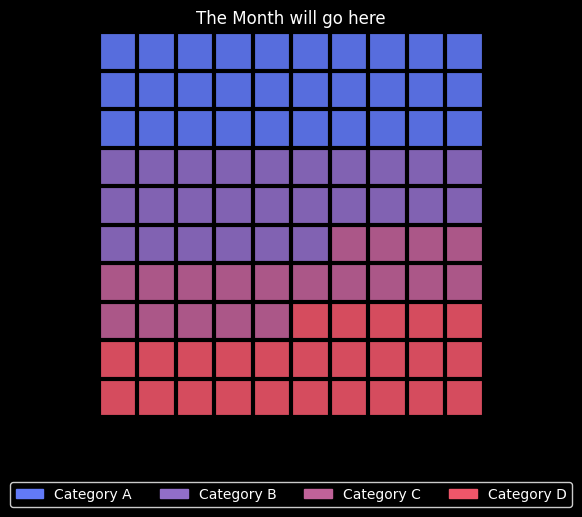

In [5]:
def create_waffle_chart(categories, values, rows=10, cols=10, colors=None, title='Waffle Chart'):
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # Define the total number of tiles
    total_tiles = rows * cols
    tiles_per_category = [round(proportion * total_tiles) for proportion in category_proportions]

    # Create a list of category indexes
    waffle_chart = np.zeros((rows, cols))

    # Populate the waffle chart
    category_index = 0
    tile_index = 0
    for r in range(rows):
        for c in range(cols):
            while tiles_per_category[category_index] == 0:
                category_index += 1
            waffle_chart[r, c] = category_index
            tiles_per_category[category_index] -= 1
            tile_index += 1

    # Plotting the waffle chart with a black background
    fig, ax = plt.subplots(figsize=(10, 5))
    fig.patch.set_facecolor('black')  # Set the figure background to black
    ax.set_facecolor('black')         # Set the axes background to black

    # Set up a colormap based on the colors provided
    if colors:
        cmap = plt.matplotlib.colors.ListedColormap(colors)
        ax.matshow(waffle_chart, cmap=cmap, alpha=0.9)
    else:
        ax.matshow(waffle_chart, cmap=plt.cm.Paired, alpha=0.9)

    # Add thick gridlines in black
    for r in range(rows + 1):
        ax.axhline(r - 0.5, color='black', linewidth=3)
    for c in range(cols + 1):
        ax.axvline(c - 0.5, color='black', linewidth=3)

    # Hide the ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Create legend below the chart
    if colors:
        handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(categories))]
        ax.legend(handles, categories, loc='upper center', bbox_to_anchor=(0.5, -0.15),
                  ncol=len(categories), facecolor='black', edgecolor='white', fontsize=10, labelcolor='white')

    plt.title(title, color='white')
    plt.show()

# Example Usage
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [40, 35, 25,33]
colors = ['#627AF7', '#916EC8', '#C06299', '#EF566A']
title_var = "The Month will go here"

create_waffle_chart(categories, values, rows=10, cols=10, colors=colors, title=title_var)


# Preparing my data

Now I need to manipulate my code so it is in the correct format to feed into the waffle charts.

In [6]:
df_sales.head(5)

,Date,Month,Year,Ticket Type,Quantity
0,02/01/2020,January,2020,Adult,4
1,02/01/2020,January,2020,Adult,5
2,04/01/2020,January,2020,Adult,2
3,07/01/2020,January,2020,Adult,1
4,08/01/2020,January,2020,Adult,10


In [7]:
#note: this is fake data and for the purpose of this exercise I am assuming all tickets were sold in the same calendar year despite there being multiple values in the year column


df_sales['Year'].unique()

array([2020, 2021, 2022, 2023])


I want to have one waffle chart per month. My *categories* variable will be the names of the 4 ticket types and the *values* variable will be the total of each type sold per month.

To achieve this, I need to group my data by month and ticket type so I have just one value per month for each ticket type.

In [8]:
#selecting only the columns I need to make grouping easier

df_new = df_sales[['Month','Ticket Type', 'Quantity']]

df_new.head(5)

,Month,Ticket Type,Quantity
0,January,Adult,4
1,January,Adult,5
2,January,Adult,2
3,January,Adult,1
4,January,Adult,10


In [9]:
#grouping the data by month and ticket type. Resetting the index to ensure the headers are correct.

grouped_sales = df_new.groupby(['Month', 'Ticket Type']).sum().reset_index()

grouped_sales.head(10)

,Month,Ticket Type,Quantity
0,April,Adult,149
1,April,Child,58
2,April,Platinum,24
3,April,VIP,29
4,August,Adult,145
5,August,Child,57
6,August,Platinum,43
7,August,VIP,20
8,December,Adult,134
9,December,Child,75


I want to sort the Month chronologically not alphabetically

In [10]:
# Define the correct chronological order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'Month' column to a categorical type with the specified order
grouped_sales['Month'] = pd.Categorical(grouped_sales['Month'], categories=month_order, ordered=True)

# Sort the DataFrame by 'Month' to ensure chronological order and resetting the index
grouped_df = grouped_sales.sort_values('Month').reset_index()

grouped_df.head(10)

,index,Month,Ticket Type,Quantity
0,19,January,VIP,12
1,18,January,Platinum,11
2,17,January,Child,68
3,16,January,Adult,144
4,15,February,VIP,28
5,14,February,Platinum,42
6,13,February,Child,43
7,12,February,Adult,125
8,28,March,Adult,156
9,31,March,VIP,21


In [11]:
#removing the additional index column so we have just the data we need

#grouped_df = grouped_df.drop('index', axis=1)

grouped_df.head(10)

,index,Month,Ticket Type,Quantity
0,19,January,VIP,12
1,18,January,Platinum,11
2,17,January,Child,68
3,16,January,Adult,144
4,15,February,VIP,28
5,14,February,Platinum,42
6,13,February,Child,43
7,12,February,Adult,125
8,28,March,Adult,156
9,31,March,VIP,21


# Preparing the variables to feed into the waffle code

I will filter to the results for January then add them to the code to make the first waffle

In [12]:
#Filtering to just the January data

january_df = grouped_df[grouped_df['Month'] == 'January']

january_df

,index,Month,Ticket Type,Quantity
0,19,January,VIP,12
1,18,January,Platinum,11
2,17,January,Child,68
3,16,January,Adult,144


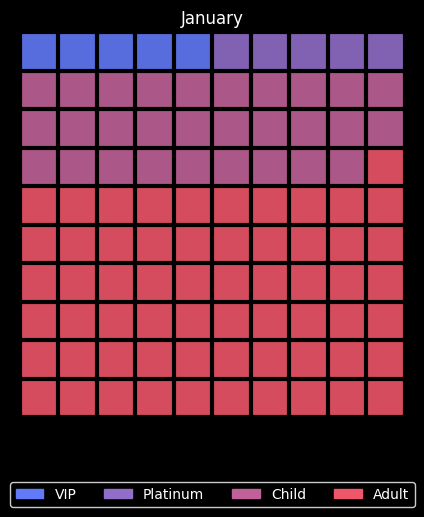

In [13]:
#Assigning the January variables

month_name = "January"
categories = january_df['Ticket Type'].tolist()
values = january_df['Quantity'].tolist()

#non-month specifc variables
colors = ['#627AF7', '#916EC8', '#C06299', '#EF566A']
title_var = month_name

#run the function I made earlier to create the waffle chart
create_waffle_chart(categories, values, rows=10, cols=10, colors=colors, title=title_var)

# Plot all 12 waffles charts

I want to create a chart for each month of the year and display them in a way that makes it easy to compare ticekts sales for each category over each month.

To do this, I will attempt to set the variables in a dynamic way so I can use a for loop to create a chart for each distinct month and display them in a 4x3 grid.

In [14]:
grouped_df.head(10)

,index,Month,Ticket Type,Quantity
0,19,January,VIP,12
1,18,January,Platinum,11
2,17,January,Child,68
3,16,January,Adult,144
4,15,February,VIP,28
5,14,February,Platinum,42
6,13,February,Child,43
7,12,February,Adult,125
8,28,March,Adult,156
9,31,March,VIP,21


/tmp/ipykernel_18/3866300862.py:56: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  grouped_df = grouped_df.pivot_table(index='Month', columns='Ticket Type', values='Quantity', fill_value=0).reset_index()


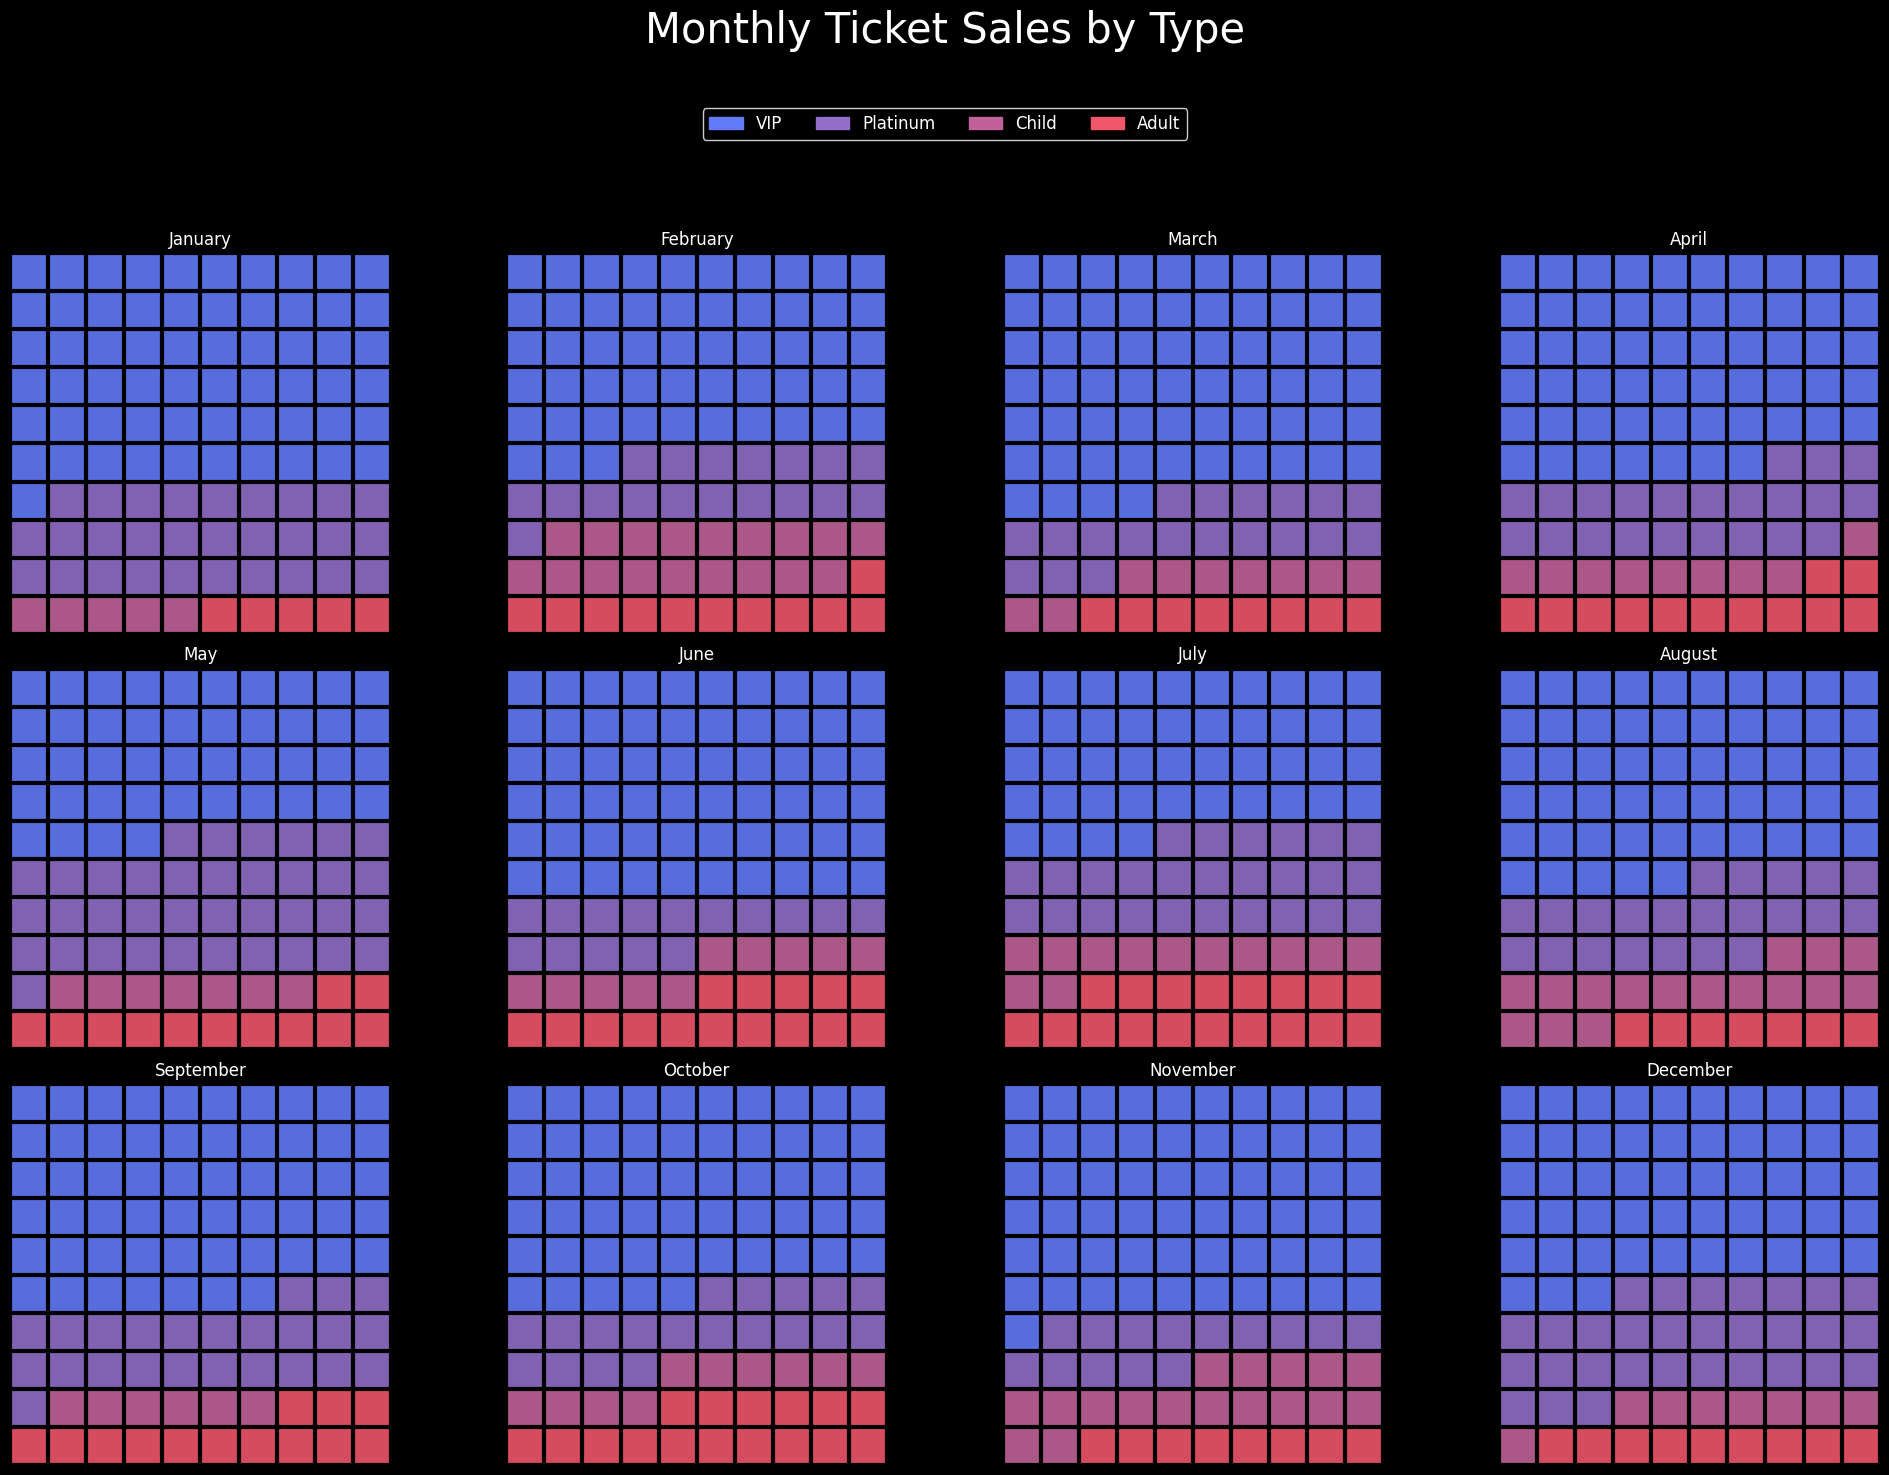

In [15]:
def create_waffle_chart(ax, categories, values, rows=10, cols=10, colors=None, title='Waffle Chart'):
    total_values = sum(values)
    category_proportions = [float(value) / total_values for value in values]

    # Define the total number of tiles
    total_tiles = rows * cols
    tiles_per_category = [round(proportion * total_tiles) for proportion in category_proportions]

    # Adjust the tiles to match the total
    tiles_sum = sum(tiles_per_category)
    if tiles_sum != total_tiles:
        difference = total_tiles - tiles_sum
        tiles_per_category[-1] += difference  # Adjust the last category

    # Create a list of category indexes
    waffle_chart = np.zeros((rows, cols))

    # Populate the waffle chart
    category_index = 0
    for r in range(rows):
        for c in range(cols):
            while tiles_per_category[category_index] == 0:
                category_index += 1
                if category_index >= len(tiles_per_category):  # Avoid index out of range
                    break
            if category_index >= len(tiles_per_category):
                break
            waffle_chart[r, c] = category_index
            tiles_per_category[category_index] -= 1

    # Plotting the waffle chart
    ax.set_facecolor('black')  # Set the axes background to black

    # Set up a colormap based on the colors provided
    if colors:
        cmap = plt.matplotlib.colors.ListedColormap(colors)
        ax.matshow(waffle_chart, cmap=cmap, alpha=0.9)
    else:
        ax.matshow(waffle_chart, cmap=plt.cm.Paired, alpha=0.9)

    # Add thick gridlines in black
    for r in range(rows + 1):
        ax.axhline(r - 0.5, color='black', linewidth=3)
    for c in range(cols + 1):
        ax.axvline(c - 0.5, color='black', linewidth=3)

    # Hide the ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set the title for each waffle chart
    ax.set_title(title, color='white', fontsize=12)

# Ensure all ticket types are represented for each month
ticket_types = grouped_df['Ticket Type'].unique()
grouped_df = grouped_df.pivot_table(index='Month', columns='Ticket Type', values='Quantity', fill_value=0).reset_index()

# Define the colors for each ticket type
colors = ['#627AF7', '#916EC8', '#C06299', '#EF566A']

# Prepare the figure for the 12 waffle charts
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
fig.patch.set_facecolor('black')  # Set the background color for the entire figure

# Add a title above all subplots
plt.suptitle("Monthly Ticket Sales by Type", color='white', fontsize=30)

# Create the legend
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(ticket_types))]
fig.legend(handles, ticket_types, loc='upper center', bbox_to_anchor=(0.5, 0.92),
           ncol=len(ticket_types), facecolor='black', edgecolor='white', fontsize=12, labelcolor='white')

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a waffle chart for each month
for i, month in enumerate(grouped_df['Month'].unique()):
    if i >= len(axes):
        break  # Prevent accessing out-of-range axes
    month_data = grouped_df[grouped_df['Month'] == month]
    values = month_data.iloc[0, 1:].values  # Exclude the 'Month' column
    
    create_waffle_chart(axes[i], ticket_types, values, rows=10, cols=10, colors=colors, title=month)

# Remove any empty subplots
for j in range(len(grouped_df['Month'].unique()), len(axes)):
    fig.delaxes(axes[j])  # Remove any empty subplots

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.88])  # Adjust layout to fit the title and legend

# Display the plot
plt.show()
